In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('pageviews.csv',parse_dates=['date'],index_col='date')

In [35]:
df.head(1)

,value
date,
2016-05-09,1201


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [18]:
# df['date'] = pd.to_datetime(df['date'])

In [23]:
# df.drop('date1', axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [66]:
df = df[(df['value']>=df['value'].quantile(0.025))&
        (df['value']<=df['value'].quantile(0.975))]

In [67]:
df

,value,month,year
date,,,
2016-06-17,21691,6,2016
2016-06-18,21681,6,2016
2016-06-20,28508,6,2016
2016-06-21,26805,6,2016
2016-06-25,21923,6,2016
...,...,...,...
2019-11-03,130118,11,2019
2019-11-09,115642,11,2019
2019-11-10,117717,11,2019


Text(0, 0.5, 'Page Views')

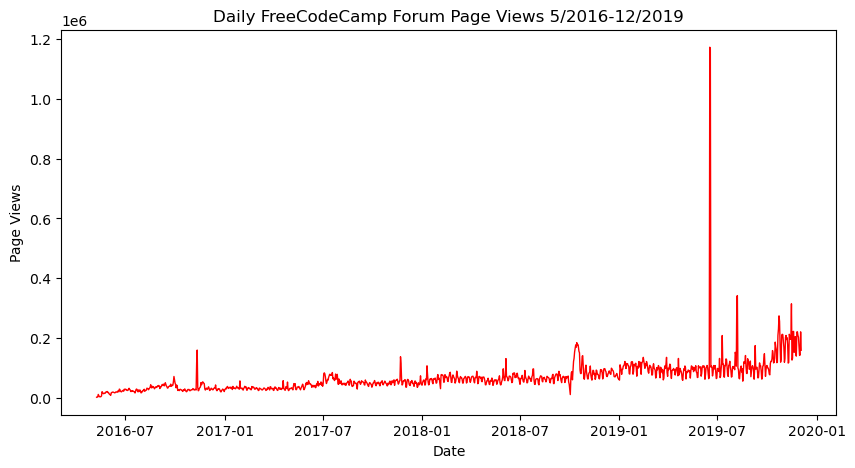

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index,df['value'],'r', linewidth=1)
ax.set_title('Daily FreeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

In [44]:
df['month'] = df.index.month
df['year'] = df.index.year

In [45]:
df

,value,month,year
date,,,
2016-05-09,1201,5,2016
2016-05-10,2329,5,2016
2016-05-11,1716,5,2016
2016-05-12,10539,5,2016
2016-05-13,6933,5,2016
...,...,...,...
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019
2019-12-01,142918,12,2019


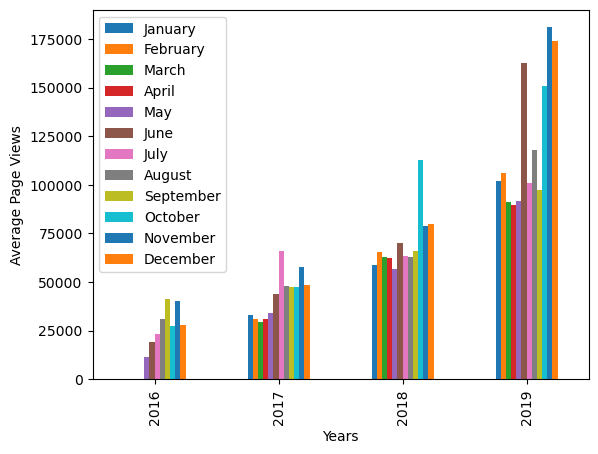

In [50]:
df.groupby(['year','month'])['value'].mean().unstack().plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(['January','February','March','April','May','June','July','August','September','October',
           'November','December'])

In [61]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [62]:
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

Text(0, 0.5, 'Page_views')

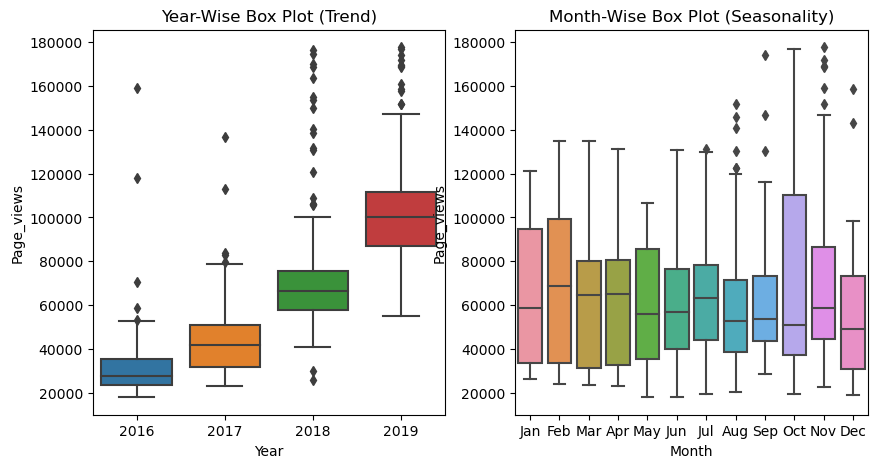

In [65]:
fig , axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])

axes[0].set_title('Year-Wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page_views')

axes[1].set_title('Month-Wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page_views')